# pythia-offset-baselines

Compare (offset-based) Pythia prefetchers against:
- Offset ideal (PC-localized and global)
- BO

Can do comparisons across:
- [Benchmark suites](#plots-suites)
- [Single becnhmarks](#plots-single-benchmarks)


In [6]:
from utils import plots, tables, utils
from matplotlib import cm
import numpy as np
%matplotlib widget

In [2]:
# Knobs
paths = {
    'baseline': '/u/cmolder/GitHub/ChampSim/out/pythia_temporal/degree1.csv',
    'voyager': '/u/cmolder/GitHub/ChampSim/out/pythia_temporal/degree1_voyager.csv',
    'offset_ideal_pc': '/u/cmolder/GitHub/ChampSim/out/pythia_temporal/llc_offset_ideal/pc.csv',
    'offset_ideal_pc_2': '/u/cmolder/GitHub/ChampSim/out/pythia_temporal/llc_offset_ideal/pc_2.csv', # Distance of 2
    'offset_ideal_pc_3': '/u/cmolder/GitHub/ChampSim/out/pythia_temporal/llc_offset_ideal/pc_3.csv', # Distance of 3
    'offset_ideal_pc_4': '/u/cmolder/GitHub/ChampSim/out/pythia_temporal/llc_offset_ideal/pc_4.csv', # Distance of 4
    'offset_ideal_global': '/u/cmolder/GitHub/ChampSim/out/pythia_temporal/llc_offset_ideal/global.csv',
    'offset_ideal_global_2': '/u/cmolder/GitHub/ChampSim/out/pythia_temporal/llc_offset_ideal/global_2.csv', # Distance of 2
    'offset_ideal_global_3': '/u/cmolder/GitHub/ChampSim/out/pythia_temporal/llc_offset_ideal/global_3.csv', # Distance of 3
    'offset_ideal_global_4': '/u/cmolder/GitHub/ChampSim/out/pythia_temporal/llc_offset_ideal/global_4.csv', # Distance of 4
    'offset_ideal_global_8': '/u/cmolder/GitHub/ChampSim/out/pythia_temporal/llc_offset_ideal/global_8.csv', # Distance of 8
    'offset_ideal_global_16': '/u/cmolder/GitHub/ChampSim/out/pythia_temporal/llc_offset_ideal/global_16.csv', # Distance of 16
    'offset_ideal_global_32': '/u/cmolder/GitHub/ChampSim/out/pythia_temporal/llc_offset_ideal/global_32.csv', # Distance of 32
    'offset_ideal_global_64': '/u/cmolder/GitHub/ChampSim/out/pythia_temporal/llc_offset_ideal/global_64.csv', # Distance of 64
    'offset_ideal_global_128': '/u/cmolder/GitHub/ChampSim/out/pythia_temporal/llc_offset_ideal/global_128.csv', # Distance of 128
    'offset_ideal_global_256': '/u/cmolder/GitHub/ChampSim/out/pythia_temporal/llc_offset_ideal/global_256.csv', # Distance of 256
}

suites = {
    'SPEC': [
        # 'astar', 'bwaves', 'bzip2', 'cactusADM', 'calculix', 'gcc', 'GemsFDTD',
        # 'gromacs', 'h264ref', 'lbm', 'leslie3d', 'libquantum', 'mcf', 'milc',
        # 'omnetpp', 'perlbench', 'soplex', 'sphinx3', 'tonto',
        # 'wrf', 'xalancbmk', 'zeusmp'
        'astar', 'bwaves', 'calculix', 'gcc', 'GemsFDTD', 'leslie3d', 
        'libquantum', 'mcf', 'omnetpp', 'perlbench', 'soplex', 'sphinx3', 
        'xalancbmk', 'zeusmp'
    ],
    'GAP': ['bc', 'bfs', 'cc', 'pr', 'sssp', 'tc'],
}
metrics  = [
    'ipc_improvement', 
    #'LLC_avg_degree', 
    'LLC_accuracy', 
    'LLC_coverage',
    #'LLC_mpki_reduction', 
]
pythia_features = [
    {'Delta_Path'},
    {'Delta_Path', 'PC_Delta'},
    {'PC_Delta'},
]
baselines = [
    'bo',
    #'spp',
    #'bingo'
]

# Plots (suites)
Fix prefetch degree to 1 for everything (except Bingo), and compare to Bingo, SPP and Bingo+SPP hybrid.

In [3]:
dfs = {
    'pythia': tables.load_stats_csv_pythia(paths['baseline'], pythia_features),
    'baseline':  tables.load_stats_csv(paths['baseline'], baselines, prefetchers_level='llc'),
    'voyager': tables.load_stats_csv(paths['voyager'], ['from_file'], prefetchers_level='llc'),
    'offset_ideal_pc': tables.load_stats_csv(paths['offset_ideal_pc'], ['from_file'], prefetchers_level='llc'),
    'offset_ideal_pc_2': tables.load_stats_csv(paths['offset_ideal_pc_2'], ['from_file'], prefetchers_level='llc'),
    'offset_ideal_pc_3': tables.load_stats_csv(paths['offset_ideal_pc_3'], ['from_file'], prefetchers_level='llc'),
    'offset_ideal_pc_4': tables.load_stats_csv(paths['offset_ideal_pc_4'], ['from_file'], prefetchers_level='llc'),
    'offset_ideal_global': tables.load_stats_csv(paths['offset_ideal_global'], ['from_file'], prefetchers_level='llc'),
    'offset_ideal_global_2': tables.load_stats_csv(paths['offset_ideal_global_2'], ['from_file'], prefetchers_level='llc'),
    'offset_ideal_global_3': tables.load_stats_csv(paths['offset_ideal_global_3'], ['from_file'], prefetchers_level='llc'),
    'offset_ideal_global_4': tables.load_stats_csv(paths['offset_ideal_global_4'], ['from_file'], prefetchers_level='llc'),
    'offset_ideal_global_8': tables.load_stats_csv(paths['offset_ideal_global_8'], ['from_file'], prefetchers_level='llc'),
    'offset_ideal_global_16': tables.load_stats_csv(paths['offset_ideal_global_16'], ['from_file'], prefetchers_level='llc'),
    'offset_ideal_global_32': tables.load_stats_csv(paths['offset_ideal_global_32'], ['from_file'], prefetchers_level='llc'),
    'offset_ideal_global_64': tables.load_stats_csv(paths['offset_ideal_global_64'], ['from_file'], prefetchers_level='llc'),
    'offset_ideal_global_128': tables.load_stats_csv(paths['offset_ideal_global_128'], ['from_file'], prefetchers_level='llc'),
    'offset_ideal_global_256': tables.load_stats_csv(paths['offset_ideal_global_256'], ['from_file'], prefetchers_level='llc'),
}

# for k, v in dfs['baseline'].items():
#     print(k)
#     print(len(v))

In [4]:
# Add Ideal Timely baselines
dfs['offset_ideal_pc_timely'] = {
    'best': tables.merge_best_prefetcher(
        dfs['offset_ideal_pc']['from_file'], 
        dfs['offset_ideal_pc_2']['from_file'],
        dfs['offset_ideal_pc_3']['from_file'],
        dfs['offset_ideal_pc_4']['from_file'],
        metric='ipc', method='max'
)}

dfs['offset_ideal_global_timely'] = {
    'best': tables.merge_best_prefetcher(
        dfs['offset_ideal_global']['from_file'], 
        dfs['offset_ideal_global_2']['from_file'],
        dfs['offset_ideal_global_3']['from_file'],
        dfs['offset_ideal_global_4']['from_file'],
        dfs['offset_ideal_global_8']['from_file'],
        dfs['offset_ideal_global_16']['from_file'],
        dfs['offset_ideal_global_32']['from_file'],
        dfs['offset_ideal_global_64']['from_file'],
        dfs['offset_ideal_global_128']['from_file'],
        dfs['offset_ideal_global_256']['from_file'],
        metric='ipc', method='max'
)}

## Ideal Offset at different static distances

=== SPEC ===


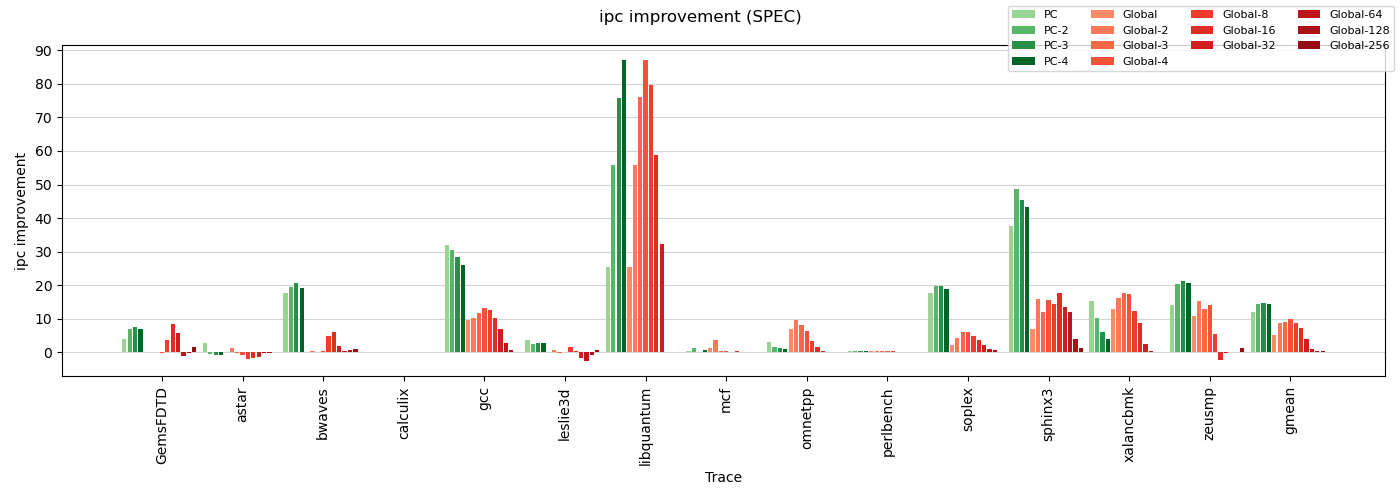

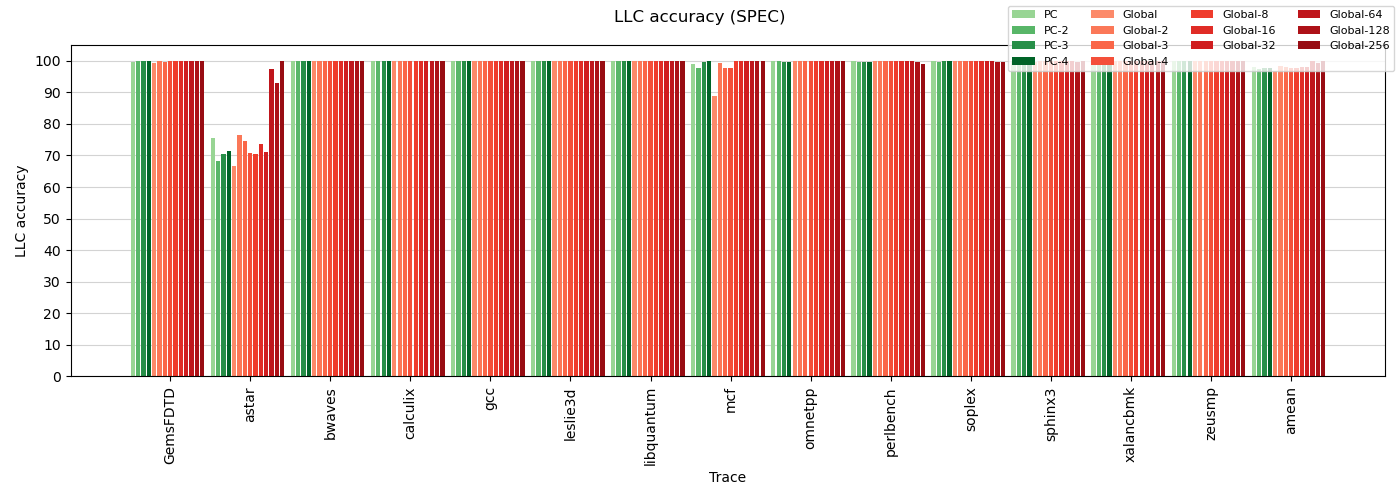

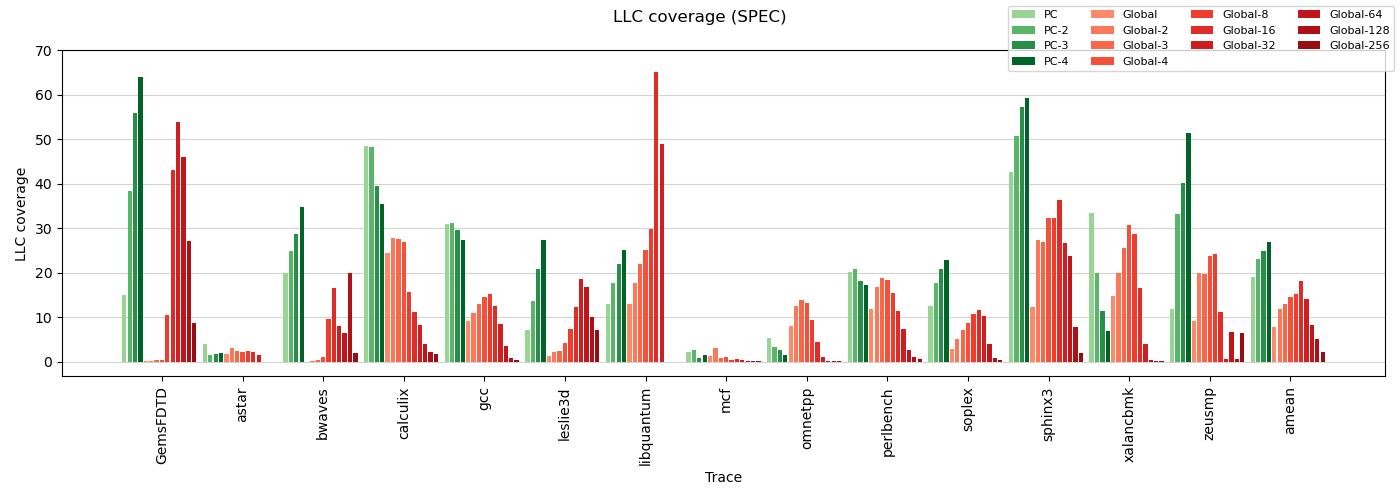

=== GAP ===


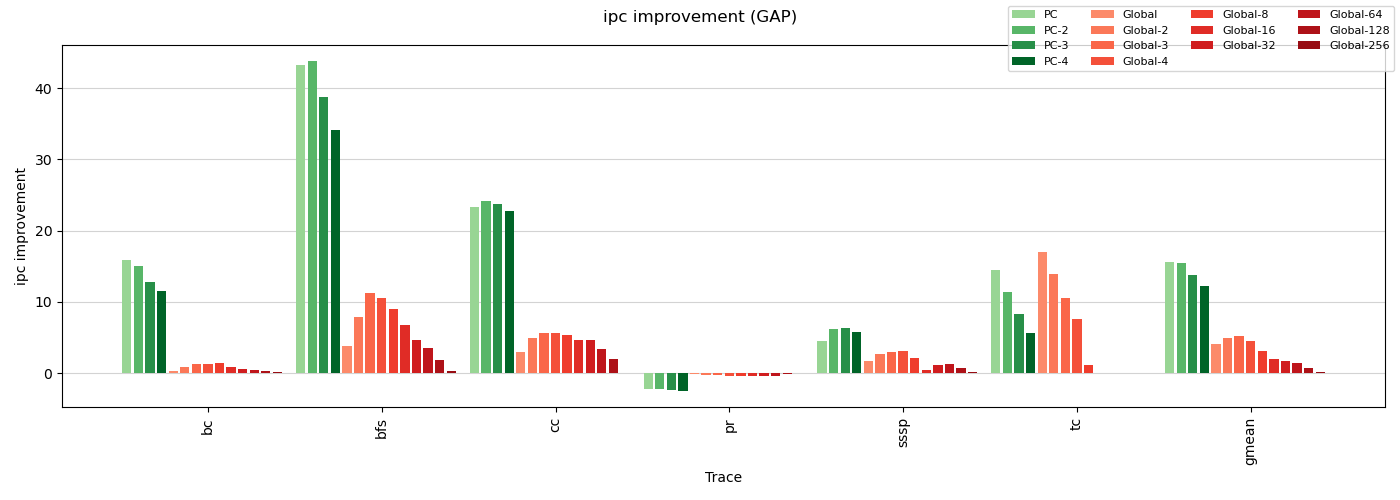

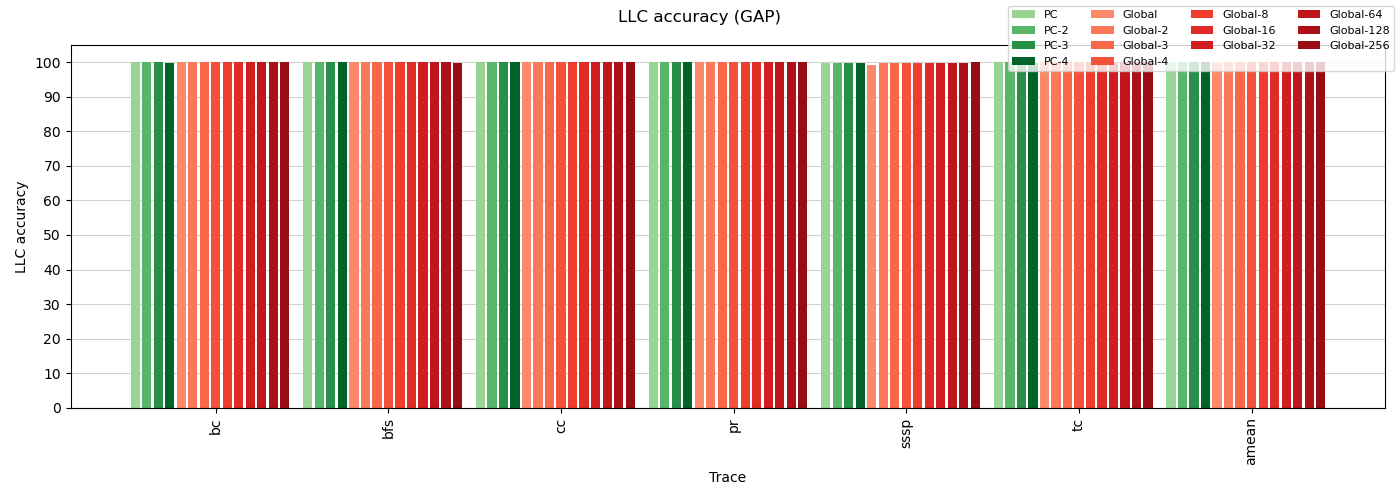

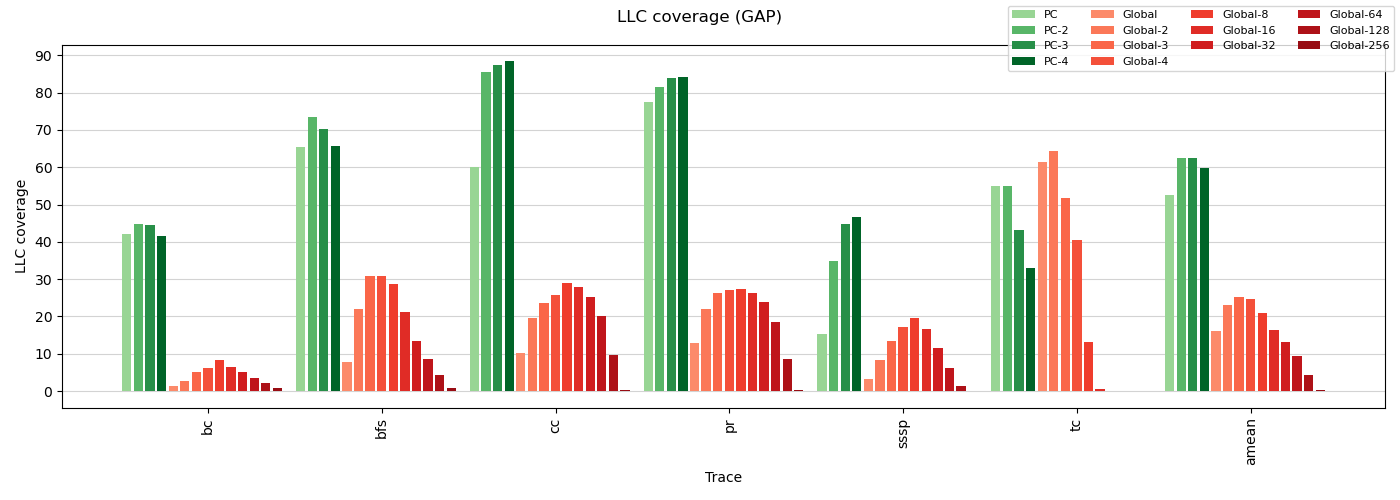

In [9]:
pcoffset_dist_df = {
    'PC': dfs['offset_ideal_pc']['from_file'],
    'PC-2': dfs['offset_ideal_pc_2']['from_file'],
    'PC-3': dfs['offset_ideal_pc_3']['from_file'],
    'PC-4': dfs['offset_ideal_pc_4']['from_file'],
    'Global': dfs['offset_ideal_global']['from_file'],
    'Global-2': dfs['offset_ideal_global_2']['from_file'],
    'Global-3': dfs['offset_ideal_global_3']['from_file'],
    'Global-4': dfs['offset_ideal_global_4']['from_file'],
    'Global-8': dfs['offset_ideal_global_8']['from_file'],
    'Global-16': dfs['offset_ideal_global_16']['from_file'],
    'Global-32': dfs['offset_ideal_global_32']['from_file'],
    'Global-64': dfs['offset_ideal_global_64']['from_file'],
    'Global-128': dfs['offset_ideal_global_128']['from_file'],
    'Global-256': dfs['offset_ideal_global_256']['from_file'],
}

pc_colormap = cm.get_cmap('Greens')
global_colormap = cm.get_cmap('Reds')
pc_color_idxs = np.linspace(0.4, 0.9, 4)
glob_color_idxs = np.linspace(0.4, 0.9, 10)

pcaddr_dist_colors = {
    'PC': pc_colormap(pc_color_idxs[0]),
    'PC-2': pc_colormap(pc_color_idxs[1]),
    'PC-3': pc_colormap(pc_color_idxs[2]),
    'PC-4': pc_colormap(pc_color_idxs[3]),
    'Global': global_colormap(glob_color_idxs[0]),
    'Global-2': global_colormap(glob_color_idxs[1]),
    'Global-3': global_colormap(glob_color_idxs[2]),
    'Global-4': global_colormap(glob_color_idxs[3]),
    'Global-8': global_colormap(glob_color_idxs[4]),
    'Global-16': global_colormap(glob_color_idxs[5]),
    'Global-32': global_colormap(glob_color_idxs[6]),
    'Global-64': global_colormap(glob_color_idxs[7]),
    'Global-128': global_colormap(glob_color_idxs[8]),
    'Global-256': global_colormap(glob_color_idxs[9]),
}
legend_kwargs = {
    'fontsize': 8,
    'ncol': 4,
}

plots.plot_everything(
    pcoffset_dist_df, suites=suites, metrics=metrics, 
    figsize=(14, 5), colors=pcaddr_dist_colors, legend_kwargs=legend_kwargs)

## PC: Ideal vs. baselines

=== SPEC ===


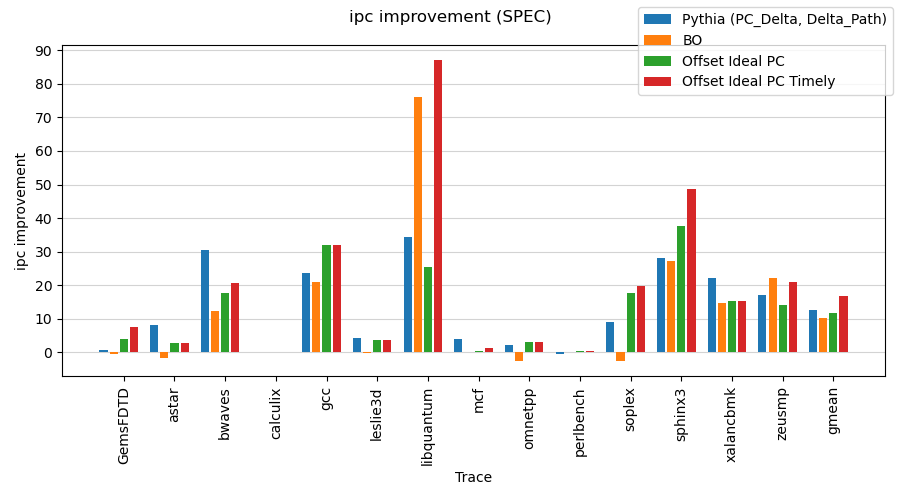

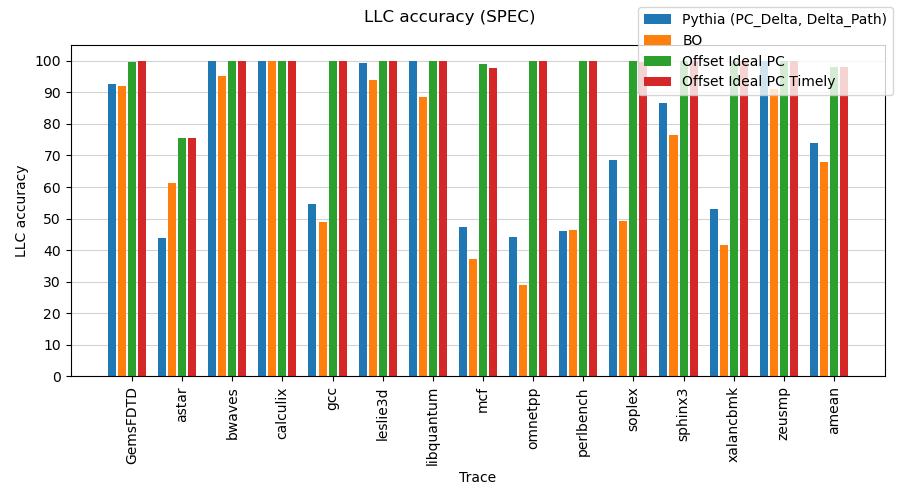

/u/cmolder/GitHub/pythia-analysis/utils/plots.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(dpi=dpi, figsize=figsize)


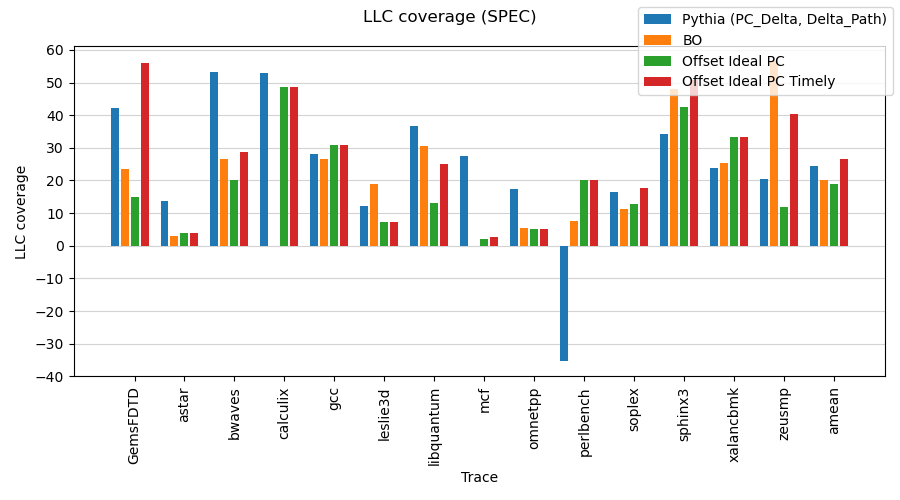

=== GAP ===


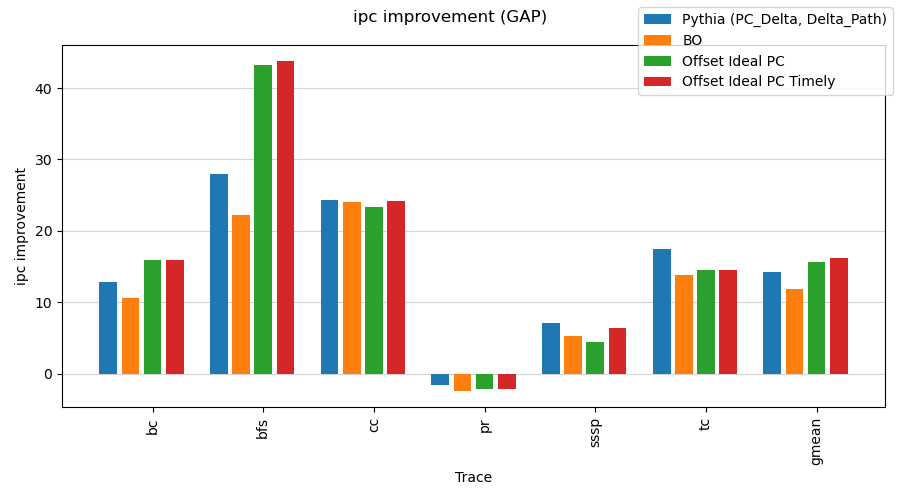

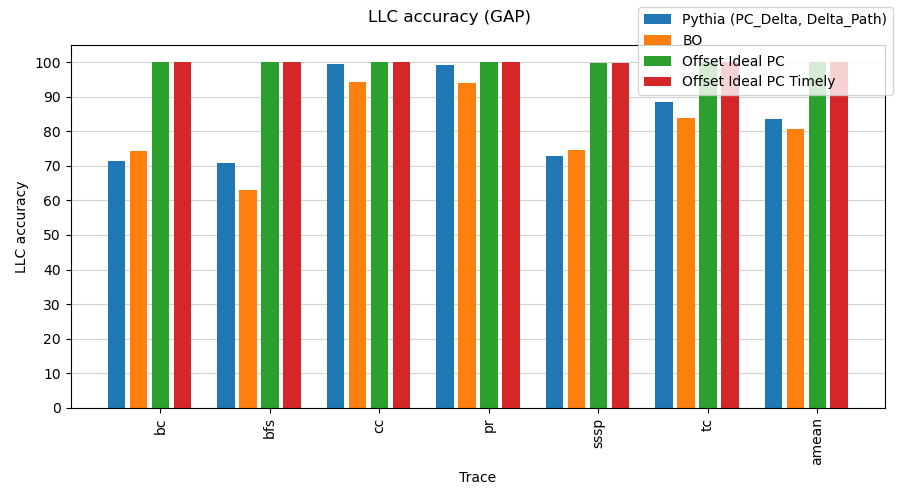

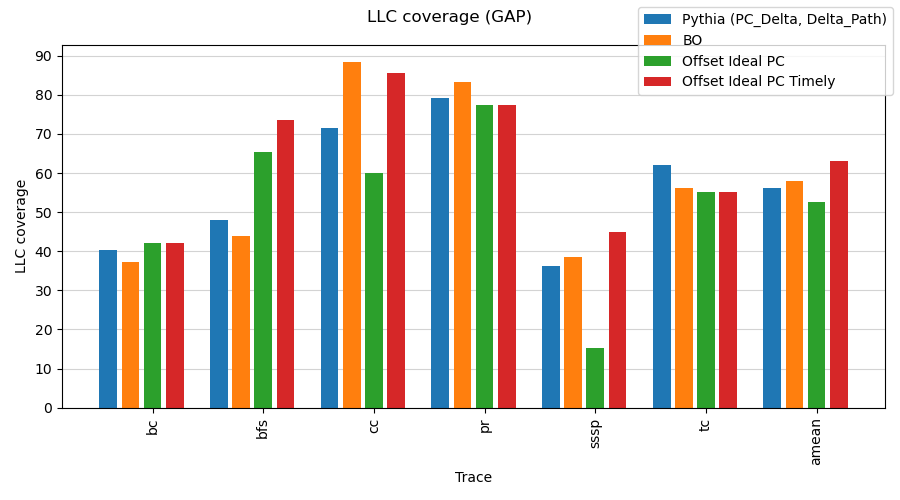

In [11]:
pc_offset_df = {
    'Pythia (PC_Delta, Delta_Path)': dfs['pythia']['Delta_Path, PC_Delta'],
    'BO': dfs['baseline']['bo'],
    'Offset Ideal PC': dfs['offset_ideal_pc']['from_file'],
    #'Offset Ideal PC-4': dfs['offset_ideal_pc_4']['from_file'],
    'Offset Ideal PC Timely': dfs['offset_ideal_pc_timely']['best']
}
plots.plot_everything(
    pc_offset_df, suites=suites, metrics=metrics, figsize=(9, 5))

## Global: Ideal vs. baselines

=== SPEC ===


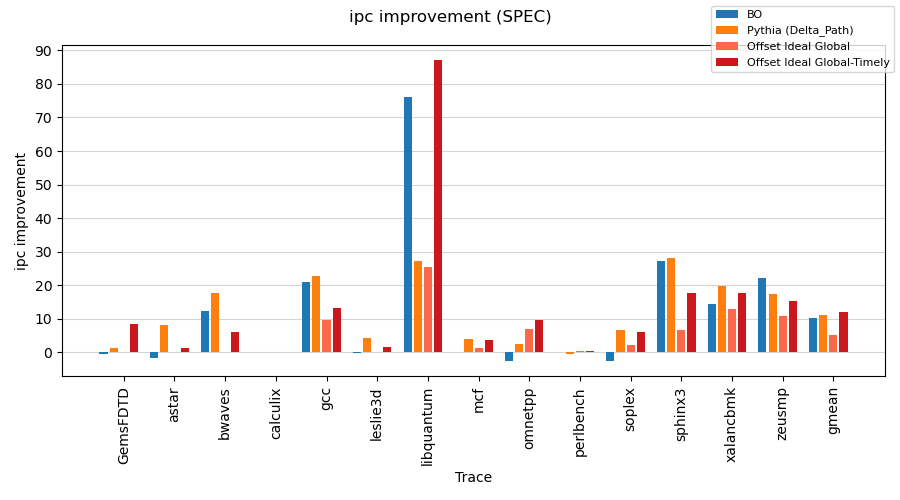

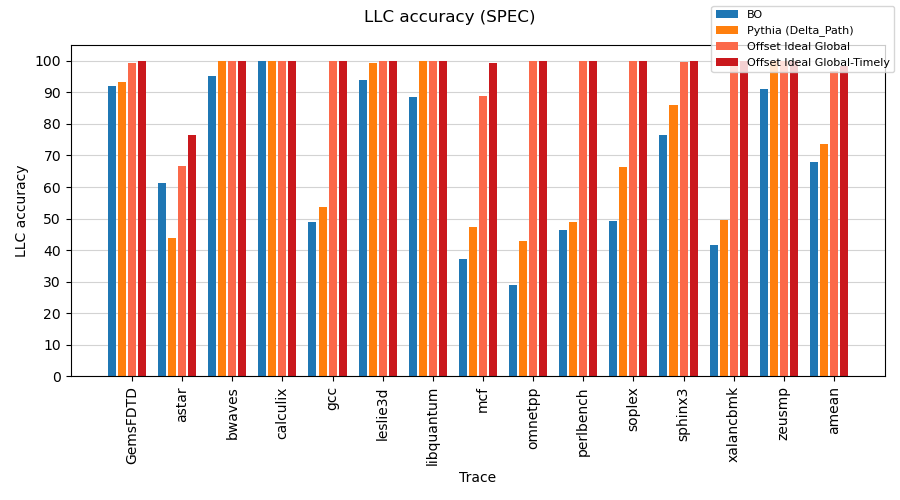

/u/cmolder/GitHub/pythia-analysis/utils/plots.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(dpi=dpi, figsize=figsize)


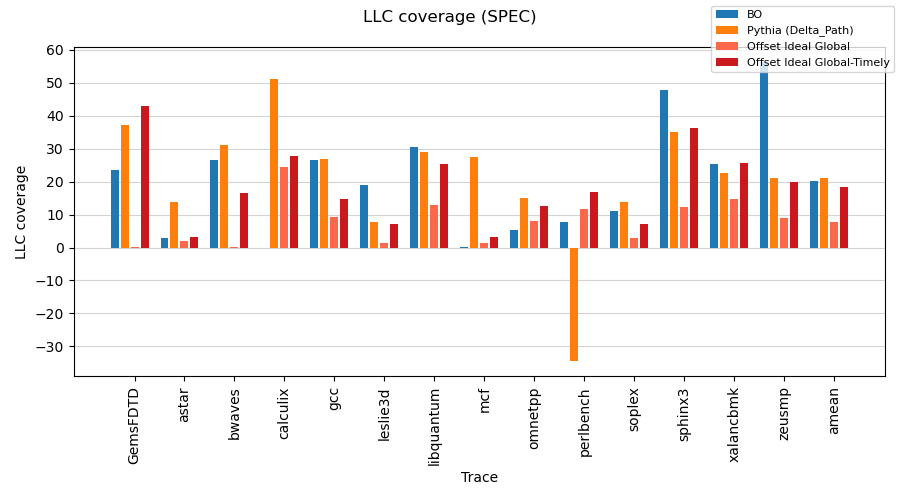

=== GAP ===


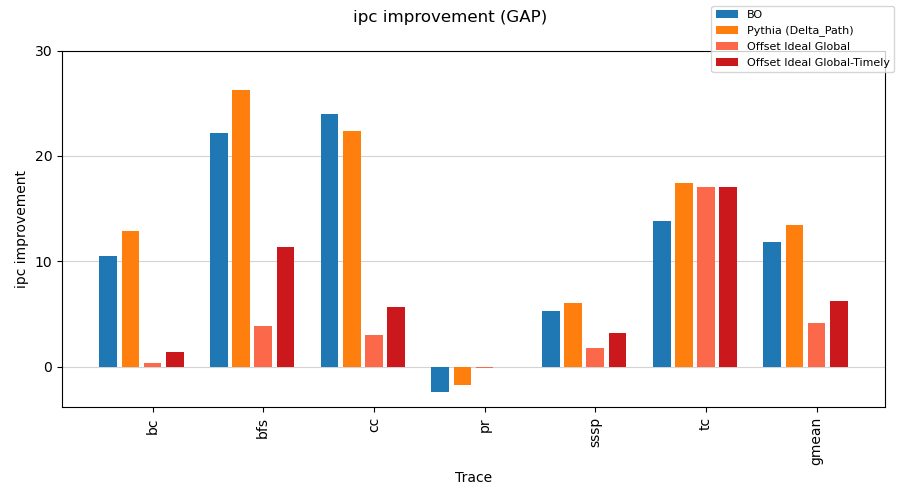

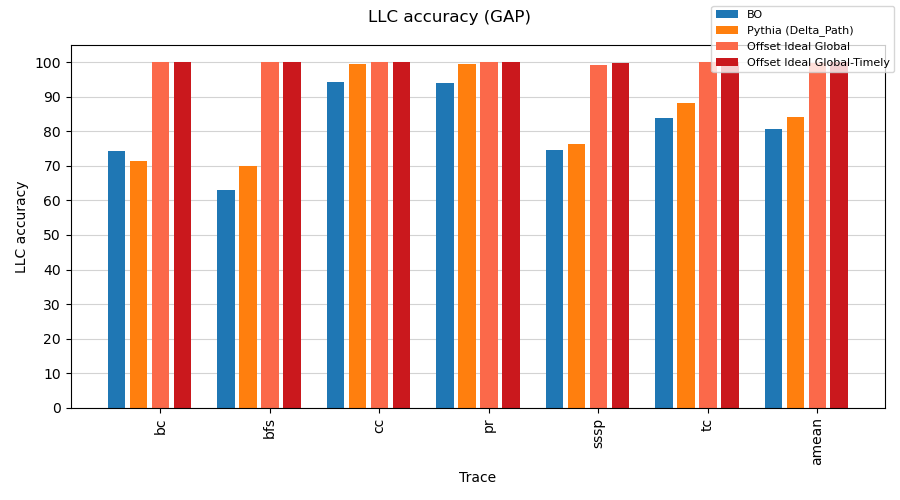

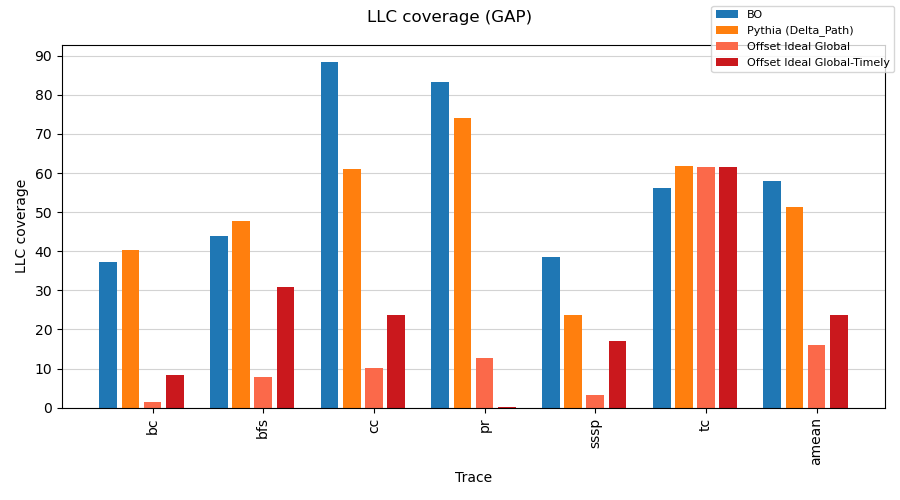

In [12]:
global_offset_df = {
    #'Pythia (PC_Delta, Delta_Path)': dfs['pythia']['Delta_Path, PC_Delta'],
    'BO': dfs['baseline']['bo'],
    'Pythia (Delta_Path)': dfs['pythia']['Delta_Path'],
    'Offset Ideal Global': dfs['offset_ideal_global']['from_file'],
    #'Offset Ideal Global-4': dfs['offset_ideal_global_4']['from_file'],
    'Offset Ideal Global-Timely': dfs['offset_ideal_global_timely']['best']
}

addr_df_colors = {
    'BO': 'C0',
    'Pythia (Delta_Path)': 'C1',
    'Offset Ideal Global': global_colormap(0.5),
    'Offset Ideal Global-Timely': global_colormap(0.75)
}

legend_kwargs = {
    'fontsize': 8,
    'ncol': 1,
}

plots.plot_everything(
    global_offset_df, suites=suites, metrics=metrics, figsize=(9, 5),
    colors=addr_df_colors, legend_kwargs=legend_kwargs)

# Tables

## PC: Pythia vs. ideal

In [12]:
tables.table_everything(pc_offset_df, suites=suites, metrics=metrics)

=== SPEC ===
Pythia (PC_Delta, Delta_Path)


,ipc_improvement,LLC_accuracy,LLC_coverage
trace,,,
GemsFDTD,0.88,92.76,42.10
astar,8.23,43.95,13.72
bwaves,30.43,99.99,53.34
calculix,0.21,100.00,52.93
gcc,23.69,54.49,28.03
leslie3d,4.34,99.17,12.32
libquantum,34.49,100.00,36.79
mcf,4.09,47.19,27.51
omnetpp,2.17,44.21,17.42


BO


,ipc_improvement,LLC_accuracy,LLC_coverage
trace,,,
GemsFDTD,-0.61,92.02,23.66
astar,-1.72,61.15,2.91
bwaves,12.38,95.04,26.61
calculix,0.00,100.00,0.00
gcc,20.87,49.06,26.61
leslie3d,-0.27,93.89,19.04
libquantum,76.00,88.60,30.58
mcf,0.03,37.24,0.03
omnetpp,-2.57,29.03,5.30


Offset Ideal PC


,ipc_improvement,LLC_accuracy,LLC_coverage
trace,,,
GemsFDTD,4.05,99.61,14.93
astar,2.70,75.47,3.90
bwaves,17.76,100.00,20.00
calculix,0.20,100.00,48.51
gcc,31.99,99.99,30.95
leslie3d,3.80,99.92,7.19
libquantum,25.41,100.00,13.01
mcf,0.40,98.87,2.11
omnetpp,3.11,99.95,5.27


Offset Ideal PC Timely


,ipc_improvement,LLC_accuracy,LLC_coverage
trace,,,
GemsFDTD,7.64,100.00,55.92
astar,2.70,75.47,3.90
bwaves,20.57,100.00,28.64
calculix,0.20,100.00,48.51
gcc,31.99,99.99,30.95
leslie3d,3.80,99.92,7.19
libquantum,87.07,100.00,25.21
mcf,1.31,97.81,2.59
omnetpp,3.11,99.95,5.27


=== GAP ===
Pythia (PC_Delta, Delta_Path)


,ipc_improvement,LLC_accuracy,LLC_coverage
trace,,,
bc,12.76,71.31,40.22
bfs,27.95,70.95,48.11
cc,24.33,99.36,71.48
pr,-1.58,99.17,79.27
sssp,7.02,72.94,36.31
tc,17.51,88.59,62.01
mean,14.22,83.72,56.23


BO


,ipc_improvement,LLC_accuracy,LLC_coverage
trace,,,
bc,10.54,74.24,37.29
bfs,22.22,63.12,43.79
cc,24.02,94.29,88.31
pr,-2.45,93.87,83.33
sssp,5.28,74.66,38.62
tc,13.79,83.90,56.06
mean,11.85,80.68,57.90


Offset Ideal PC


,ipc_improvement,LLC_accuracy,LLC_coverage
trace,,,
bc,15.87,99.99,42.00
bfs,43.19,99.98,65.41
cc,23.36,100.00,60.06
pr,-2.23,99.99,77.42
sssp,4.47,99.74,15.28
tc,14.52,100.00,55.08
mean,15.66,99.95,52.54


Offset Ideal PC Timely


,ipc_improvement,LLC_accuracy,LLC_coverage
trace,,,
bc,15.87,99.99,42.00
bfs,43.73,99.98,73.56
cc,24.19,100.00,85.68
pr,-2.23,99.99,77.42
sssp,6.34,99.81,44.83
tc,14.52,100.00,55.08
mean,16.21,99.96,63.09


## Global: Pythia vs. ideal

In [13]:
tables.table_everything(global_offset_df, suites=suites, metrics=metrics)

=== SPEC ===
BO


,ipc_improvement,LLC_accuracy,LLC_coverage
trace,,,
GemsFDTD,-0.61,92.02,23.66
astar,-1.72,61.15,2.91
bwaves,12.38,95.04,26.61
calculix,0.00,100.00,0.00
gcc,20.87,49.06,26.61
leslie3d,-0.27,93.89,19.04
libquantum,76.00,88.60,30.58
mcf,0.03,37.24,0.03
omnetpp,-2.57,29.03,5.30


Pythia (Delta_Path)


,ipc_improvement,LLC_accuracy,LLC_coverage
trace,,,
GemsFDTD,1.43,93.15,37.25
astar,8.16,43.72,13.88
bwaves,17.66,99.99,31.09
calculix,0.20,100.00,51.06
gcc,22.90,53.69,27.03
leslie3d,4.44,99.30,7.79
libquantum,27.24,100.00,29.04
mcf,4.07,47.22,27.50
omnetpp,2.57,42.98,14.97


Offset Ideal Global


,ipc_improvement,LLC_accuracy,LLC_coverage
trace,,,
GemsFDTD,-0.01,99.26,0.16
astar,0.25,66.79,1.83
bwaves,0.05,100.00,0.02
calculix,0.09,100.00,24.52
gcc,9.65,99.99,9.18
leslie3d,0.13,99.88,1.40
libquantum,25.42,100.00,13.02
mcf,1.40,88.73,1.23
omnetpp,6.93,99.94,8.05


Offset Ideal Global-Timely


,ipc_improvement,LLC_accuracy,LLC_coverage
trace,,,
GemsFDTD,8.43,99.89,43.04
astar,1.19,76.43,3.14
bwaves,5.95,99.96,16.63
calculix,0.10,100.00,27.84
gcc,13.12,100.00,14.65
leslie3d,1.56,99.95,7.29
libquantum,87.09,100.00,25.21
mcf,3.79,99.34,3.16
omnetpp,9.63,99.98,12.46


=== GAP ===
BO


,ipc_improvement,LLC_accuracy,LLC_coverage
trace,,,
bc,10.54,74.24,37.29
bfs,22.22,63.12,43.79
cc,24.02,94.29,88.31
pr,-2.45,93.87,83.33
sssp,5.28,74.66,38.62
tc,13.79,83.90,56.06
mean,11.85,80.68,57.90


Pythia (Delta_Path)


,ipc_improvement,LLC_accuracy,LLC_coverage
trace,,,
bc,12.86,71.41,40.23
bfs,26.21,69.96,47.76
cc,22.34,99.55,60.90
pr,-1.77,99.49,74.11
sssp,6.01,76.27,23.58
tc,17.42,88.24,61.67
mean,13.44,84.16,51.38


Offset Ideal Global


,ipc_improvement,LLC_accuracy,LLC_coverage
trace,,,
bc,0.31,100.00,1.37
bfs,3.85,100.00,7.75
cc,3.00,100.00,10.08
pr,-0.17,99.99,12.84
sssp,1.76,99.35,3.17
tc,17.00,100.00,61.47
mean,4.14,99.89,16.11


Offset Ideal Global-Timely


,ipc_improvement,LLC_accuracy,LLC_coverage
trace,,,
bc,1.37,100.00,8.37
bfs,11.30,100.00,30.87
cc,5.68,100.00,23.69
pr,-0.01,100.00,0.25
sssp,3.14,99.82,17.11
tc,17.00,100.00,61.47
mean,6.25,99.97,23.63
